In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
from functools import partial
import random
#import cv2
from PIL import Image
import matplotlib.image as mpimg
from scipy.spatial.distance import cdist

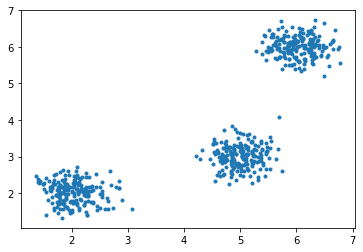

In [66]:
x1 = np.random.normal([2,2],0.3,[200,2])
x2 = np.random.normal([6,6],0.3,[200,2])
x3 = np.random.normal([3,5],0.3,[200,2])

dados = np.concatenate([x1, x2, x3])
plt.plot(dados[:,1],dados[:,0],'.')
plt.show()

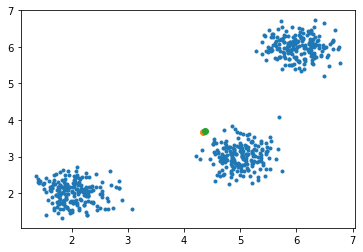

Número de iterações: 5


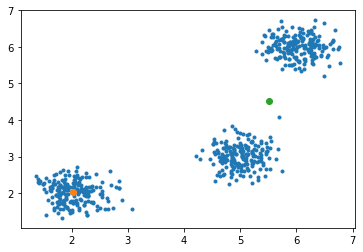

In [73]:
dados_df = pd.DataFrame(dados)

lendata = len(dados)
#Número de clusters
k = 2

#Vetor que indica em qual cluster está a amostra
idx = np.zeros((lendata,1))


#Matriz de partições
particao = np.zeros((lendata,k))

############################ Passo 1 ###############################
#Atribuir cada ponto a um determido cluster de forma aleatória
for i in range(lendata):
    rnd = np.random.randint(k)
    particao[i][rnd] = 1
    idx[i] = rnd

centr = calc_centroids(dados_df, particao)

#print(idx)
#print(centr)

#Plotar dados e os centróides
plt.plot(dados[:,1],dados[:,0],'.')
for i in range(k):
    plt.plot(centr[i,1],centr[i,0],'o')
plt.show()

dist_total = 0
itr = 0
while(1):  
    
    ################### Passo 2 ##############################
    for j in range(lendata):
        menor_dist = 1000000
        for ii in range(k):
            menor_dist_aux = np.linalg.norm(dados[j,:]- centr[ii,:])
            if menor_dist_aux <= menor_dist:
                menor_dist = menor_dist_aux
                idx[j] = ii
    
    ################### Passo 3 ###############################
    #Calcula a distancia total entro os ponto e o cluster associado
    dist = np.zeros((lendata,1))
    for i_am in range(lendata):
        i_cl = idx[i_am]
        i_cl= int(i_cl)
        dist[i_am] = np.linalg.norm(dados[i_am,:]-centr[i_cl,:])
    dist_total_aux = np.sum(dist)
    
    #Condição para sair do laço
    if dist_total_aux == dist_total:
        break
    else:
        dist_total = dist_total_aux
        itr += 1
    
    
    ###################### Passo 4 #############################
    particao = np.zeros((lendata,k))
    for i in range(lendata):
        rnd = idx[i]
        particao[i][int(rnd)] = 1

    centr = calc_centroids(dados_df, particao)

print('Número de iterações:', itr)

#Plotar dados e os centróides
plt.plot(dados[:,1],dados[:,0],'.')
for i in range(k):
    plt.plot(centr[i,1],centr[i,0],'o')

plt.show()


In [24]:
def calc_centroids(data, partitions):
    
    #Número de características
    nfeatures = data.shape[1]
    
    #Número de partições
    K = partitions.shape[1]
    
    #K centroides com dimensões igual ao número de features
    centroids = np.zeros([K,nfeatures])
    
    #Valores do DataFrame de dados
    data_np = data.values
    
    #Cálcula a posição dos centóides
    for i in range(K):
        #Verifica quais amostras estão contidas no cluster i
        idx_nonzero =  np.flatnonzero(partitions[:,i])
        
        #Armazena o conteúdo presente no cluster i
        data_i = data_np[idx_nonzero,:]
        
        #Posiciona o centróide na posição média do cluster i 
        centroids[i] = np.mean(data_i, axis=0)
    return centroids